#### About Dataset
**Context**
The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

This dataset became a typical test case for many statistical classification techniques in machine learning such as support vector machines

**Content**
The dataset contains a set of 150 records under 5 attributes - Petal Length, Petal Width, Sepal Length, Sepal width and Class(Species).

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [6]:
df=pd.read_csv("C:\\Users\\sulai\\Downloads\\RD INFRO TECHNOLOGY\\iris flower\\IRIS.csv")

In [9]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [17]:
df.duplicated().sum()

3

In [19]:
df.drop_duplicates(inplace=True)

In [21]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [23]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Univariate Analysis

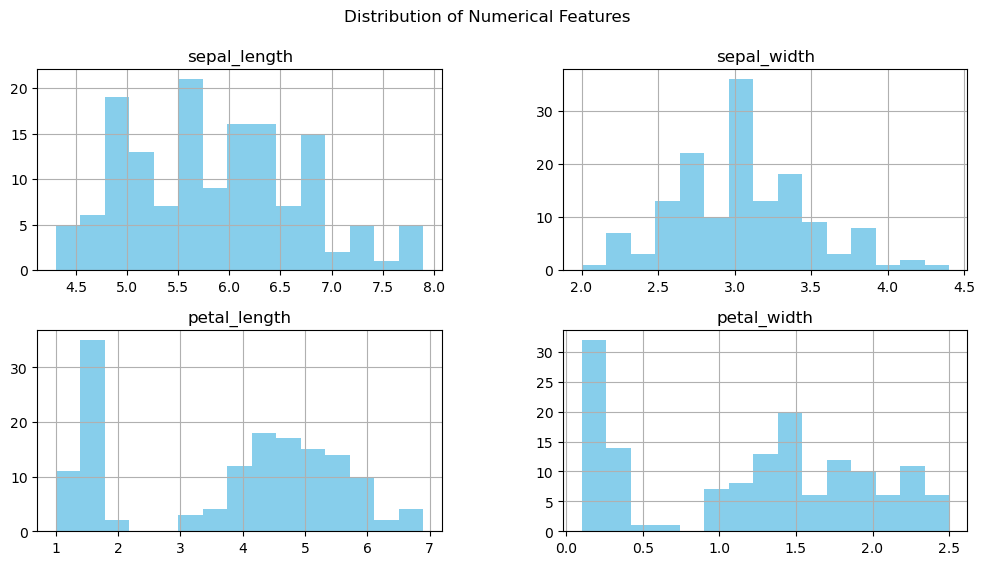

In [29]:
num_cols = ['sepal_length','sepal_width','petal_length','petal_width']
df[num_cols].hist(figsize=(12,6),bins=15,color='skyblue')
plt.suptitle('Distribution of Numerical Features')
plt.show()

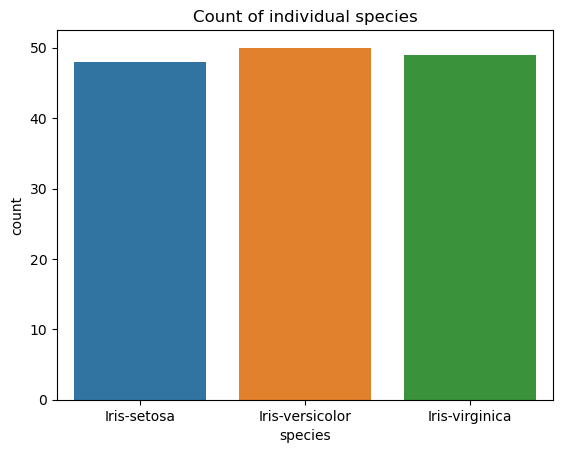

In [35]:
sns.countplot(data=df,x=df['species'],hue=df['species'])
plt.title('Count of individual species')
plt.show()

##  Bivariate Analysis

**Relationship between sepal length and width**

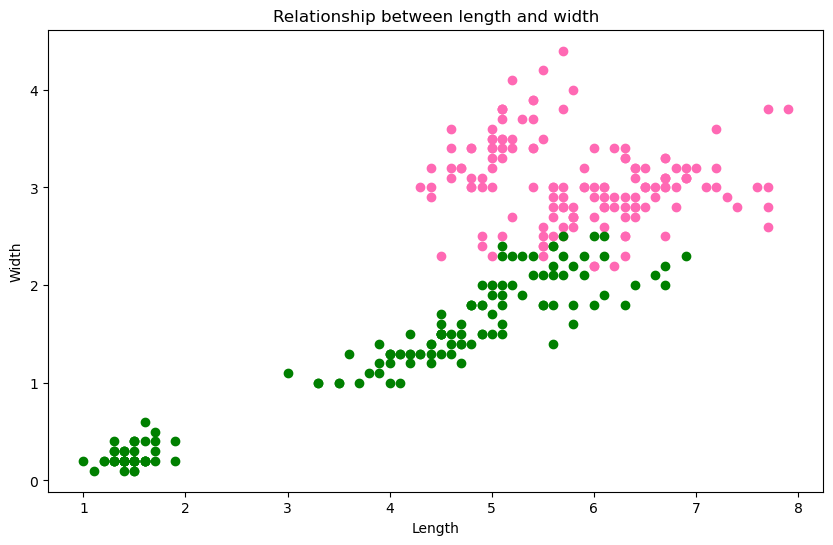

In [54]:
plt.figure(figsize=(10,6))
plt.scatter(x='sepal_length',y='sepal_width',data=df,color='hotpink')
plt.scatter(x='petal_length', y='petal_width', data = df, color = 'green')
plt.title("Relationship between length and width")
plt.xlabel("Length")
plt.ylabel("Width")
plt.show()

##### Petals(Green): Longer the length, wider is the width of the petal
##### Sepal (Hotpink): No relationship between Length and Width of the Sepal

In [67]:
corr_petal=df['petal_length'].corr(df['petal_width'])
print(f"Correlation coeffient between \npetal length and width: {corr_petal:.2f}")

corr_sepal=df['sepal_length'].corr(df['sepal_width'])
print(f"\nsepal length and width: {corr_sepal:.2f}")

Correlation coeffient between 
petal length and width: 0.96

sepal length and width: -0.11


**Relationship between length of the Petal and Sepal**

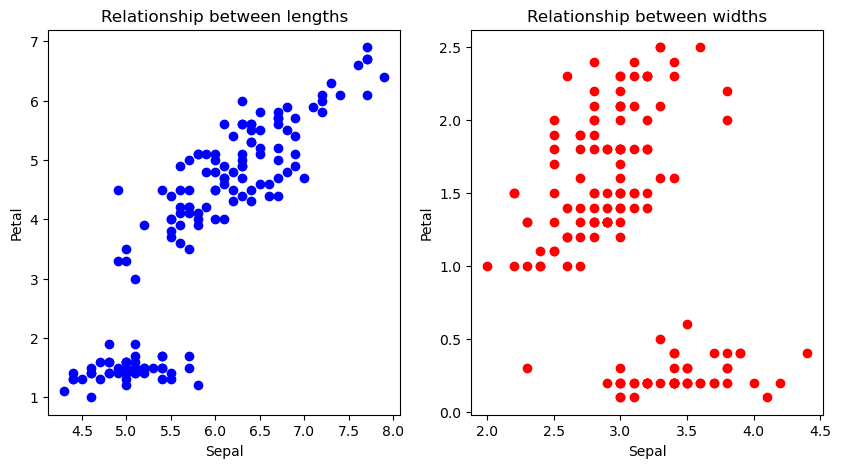

In [74]:
plt.figure(figsize=(10,5))


plt.subplot(1,2,1)
plt.scatter(x='sepal_length',y='petal_length',data=df,color='blue')
plt.title("Relationship between lengths")
plt.xlabel("Sepal")
plt.ylabel("Petal")

plt.subplot(1,2,2)
plt.scatter(x='sepal_width', y='petal_width', data = df, color = 'red')
plt.title("Relationship between widths")
plt.xlabel("Sepal")
plt.ylabel("Petal")
plt.show()

**Lengths: Increase in Sepal length increases Petal**


**Width: There is no relationship between width of Petal and Sepal**

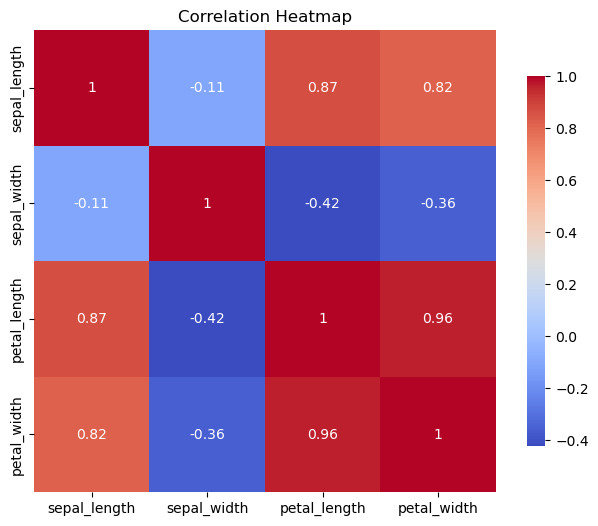

In [80]:
plt.figure(figsize=(8, 6))
correlation = df[num_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', square=True, cbar_kws={'shrink': 0.8})
plt.title("Correlation Heatmap")
plt.show()

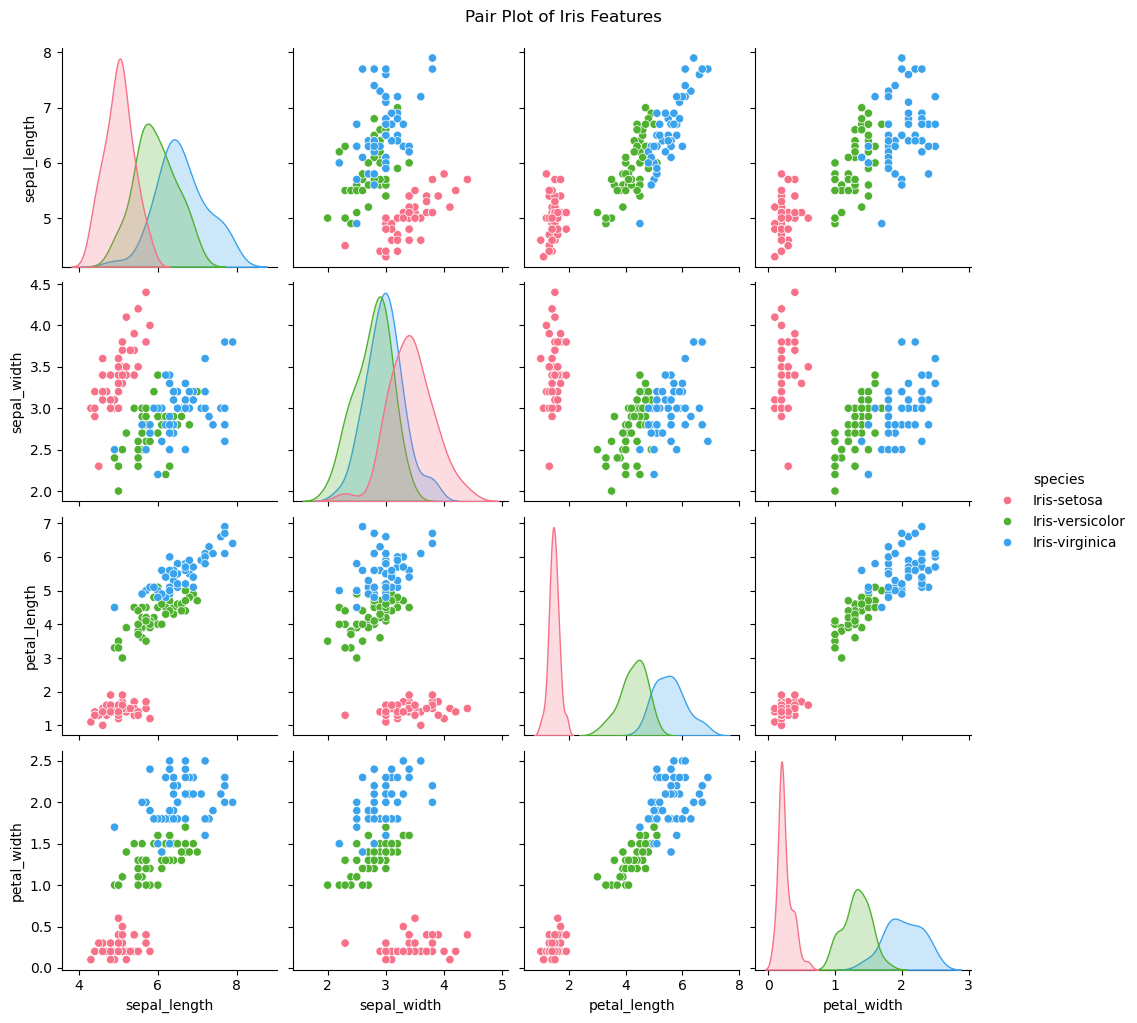

In [82]:
sns.pairplot(df, hue='species', palette='husl', diag_kind='kde')
plt.suptitle("Pair Plot of Iris Features", y=1.02)
plt.show()

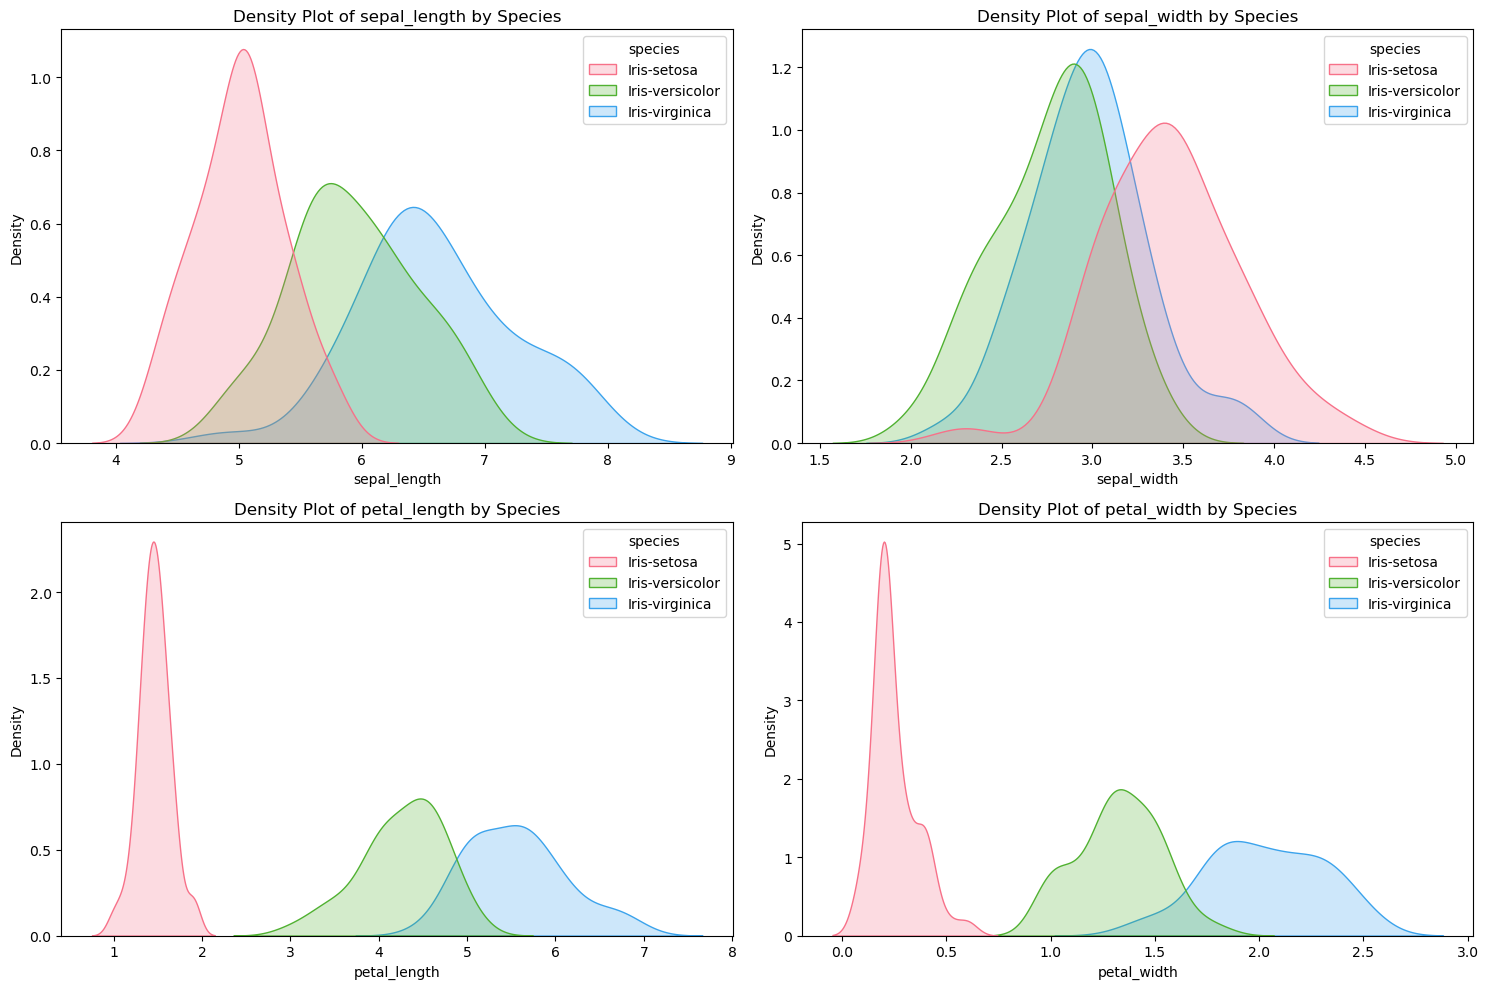

In [84]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i + 1)
    sns.kdeplot(data=df, x=col, hue='species', fill=True, common_norm=False, palette='husl')
    plt.title(f"Density Plot of {col} by Species")
    plt.xlabel(col)
    plt.ylabel("Density")

plt.tight_layout()
plt.show()

In [86]:
from sklearn.preprocessing import LabelEncoder

In [88]:
encoder = LabelEncoder()

In [94]:
df_copy = df

In [96]:
X = df_copy[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df_copy['species']

In [98]:
y = encoder.fit_transform(y)

In [100]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=69,test_size=0.25)

In [106]:
from sklearn.svm import SVR
svr = SVR()

In [108]:
svr.fit(X_train,y_train)

SVR()

In [110]:
y_pred = svr.predict(X_test)

In [112]:
from sklearn.metrics import r2_score,mean_absolute_error
a = r2_score(y_test,y_pred)
b = mean_absolute_error(y_test,y_pred)
print("r2_score is:",a)
print("the mean absolute error is:",b)

r2_score is: 0.9549500774045058
the mean absolute error is: 0.1193196054295874


### hyperparameter tuning using GridSearchCV

In [123]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.1,1,10,100,1000],
             'gamma':[1,0.1,0.01,0.001,0.0001],
             'kernel': ['rbf']}

In [125]:
grid=GridSearchCV(SVR(),param_grid,refit=True,verbose=3)

grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.868 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.871 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.919 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.803 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.863 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.817 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.927 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.865 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.882 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.578 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [127]:
grid.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [129]:
grid_prediction=grid.predict(X_test)

In [135]:
from sklearn.metrics import r2_score,mean_absolute_error
a1=r2_score(y_test,grid_prediction)
b1=mean_absolute_error(y_test,grid_prediction)
print(a1)
print(b1)

0.9390342190507105
0.13216195721834448


**Final Estimation and Description**
#### 1. Initial Model Performance (Without Hyperparameter Tuning):

**Model: Support Vector Regressor (SVR) with default hyperparameters.**

*R² Score: 0.95495**

*Mean Absolute Error (MAE): 0.11932**

**Description:**

The initial SVR model performed well on the training data, achieving a high R² score (close to 1) and a low MAE. This indicates that the model explains a significant portion of the variance in the target variable and has relatively small prediction errors.

#### 2. Hyperparameter Tuning with GridSearchCV:
**GridSearchCV Parameters:**

C: [0.1, 1, 10, 100, 1000] (Regularization parameter)

gamma: [1, 0.1, 0.01, 0.001, 0.0001] (Kernel coefficient)

kernel: ['rbf'] (Radial Basis Function kernel)

**Best Hyperparameters:**

C: 100

gamma: 0.1

kernel: 'rbf'

**Description:**

After performing a grid search over the specified hyperparameter space, the best combination of hyperparameters was found to be C=100, gamma=0.1, and kernel='rbf'. These hyperparameters were used to refit the model.

#### 3. Final Model Performance (After Hyperparameter Tuning):
**R² Score: 0.93903**

**Mean Absolute Error (MAE): 0.13216**

**Description:**

The tuned model performed slightly worse on the test data compared to the initial model, with a lower R² score (0.93903 vs 0.95495) and a slightly higher MAE (0.13216 vs 0.11932). This suggests that the initial model might have been slightly overfitting the training data, and the tuned model generalizes better to unseen data.

## Conclusion
**Dataset Overview:**

The Iris Flower Dataset is a classic dataset used for classification and regression tasks. It contains 150 samples of iris flowers, with four features (sepal_length, sepal_width, petal_length, petal_width) and a target variable (species). In this analysis, we used the dataset for a regression task, predicting one of the features (e.g., petal_width) based on the others.

## Insights:
**Petals:** Strong positive relationship between petal length and width. Longer petals are wider in width

**Sepal**: No relationship between Sepal length and width

**Petal vs Sepal:** Petal length increase with sepal length, whereas their width are not significantly correlated

Relationship within the species for repespective lengths vs width are all the positive. Virginica and Versicolor shows increase length of petals with increase in its width. Similar obesrvation for sepal

**Key Takeaways:**

*Hyperparameter Tuning:* GridSearchCV helped identify the optimal hyperparameters (C=100, gamma=0.1, kernel='rbf') for the SVR model, improving its generalization capability.

*Overfitting:* The initial model's slightly higher performance on the training data compared to the test data suggests some degree of overfitting, which was mitigated by hyperparameter tuning.

*Model Suitability:* SVR is a suitable model for this dataset, as it can capture the complex relationships between the features and the target variable.